# 0. 라이브러리 불러오기

In [1]:
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

import sklearn
from sklearn.metrics import accuracy_score

import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist

In [2]:
print("library version check")
print("numpy: ", np.__version__)
print("seaborn: ", sns.__version__)
print("matplotlib: ", mpl.__version__)
print("sklearn: ", sklearn.__version__)
print("tensorflow: ", tensorflow.__version__)

library version check
numpy:  1.23.5
seaborn:  0.12.1
matplotlib:  3.6.2
sklearn:  1.1.3
tensorflow:  2.10.0


In [3]:
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
mpl.style.use("default")
mpl.rcParams.update({"figure.constrained_layout.use": True})

sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

# 1. 모델 및 데이터 불러오기

In [4]:
# model load
model_mnist = load_model("../model/240603_mnist.h5")
model_mnist_dropout = load_model("../model/240603_mnist_dropout.h5")

In [5]:
# data load
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# min-max scaling
x_train, x_test = x_train / x_train.max(), x_test / x_train.max()

# 데이터의 shape을 변경
x_train_re = np.reshape(x_train, (x_train.shape[0], 28*28))
x_test_re = np.reshape(x_test, (x_test.shape[0], 28*28))

##one-hot encoding으로 변경
y_train = to_categorical(y_train)

# 2. 모델은 어떤 숫자를 많이 틀렸을까?

In [6]:
#model_mnist가 틀린 index
pred = [np.argmax(i) for i in model_mnist.predict(x_test_re)]
incor_indx = [i for i in range(len(y_test)) if y_test[i] != pred[i]]

#model_mnist_dropout이 틀린 index
pred_dropout = [np.argmax(i) for i in model_mnist_dropout.predict(x_test_re)]
incor_dropout_indx = [i for i in range(len(y_test)) if y_test[i] != pred_dropout[i]]

# 두 모델이 공통으로 틀린 index
incor = list(set(incor_indx) & set(incor_dropout_indx))

313/313 [==============================] - 1s 3ms/step


In [7]:
# model_mnist가 틀린 숫자 count
incor_dict = {}

for i in incor_indx:
    if pred[i] in incor_dict:
        incor_dict[pred[i]] += 1
    else:
        incor_dict[pred[i]] = 1
        
# model_mnist_dropout이 틀린 숫자 count
incor_dropout_dict = {}

for i in incor_dropout_indx:
    if pred_dropout[i] in incor_dropout_dict:
        incor_dropout_dict[pred_dropout[i]] += 1
    else:
        incor_dropout_dict[pred_dropout[i]] = 1

In [8]:
incor_dict

{9: 20, 7: 41, 2: 18, 0: 42, 3: 38, 4: 32, 6: 24, 5: 10, 1: 9, 8: 10}

In [9]:
incor_dropout_dict

{8: 37, 5: 24, 2: 32, 0: 19, 3: 21, 7: 24, 9: 29, 6: 22, 4: 20, 1: 19}

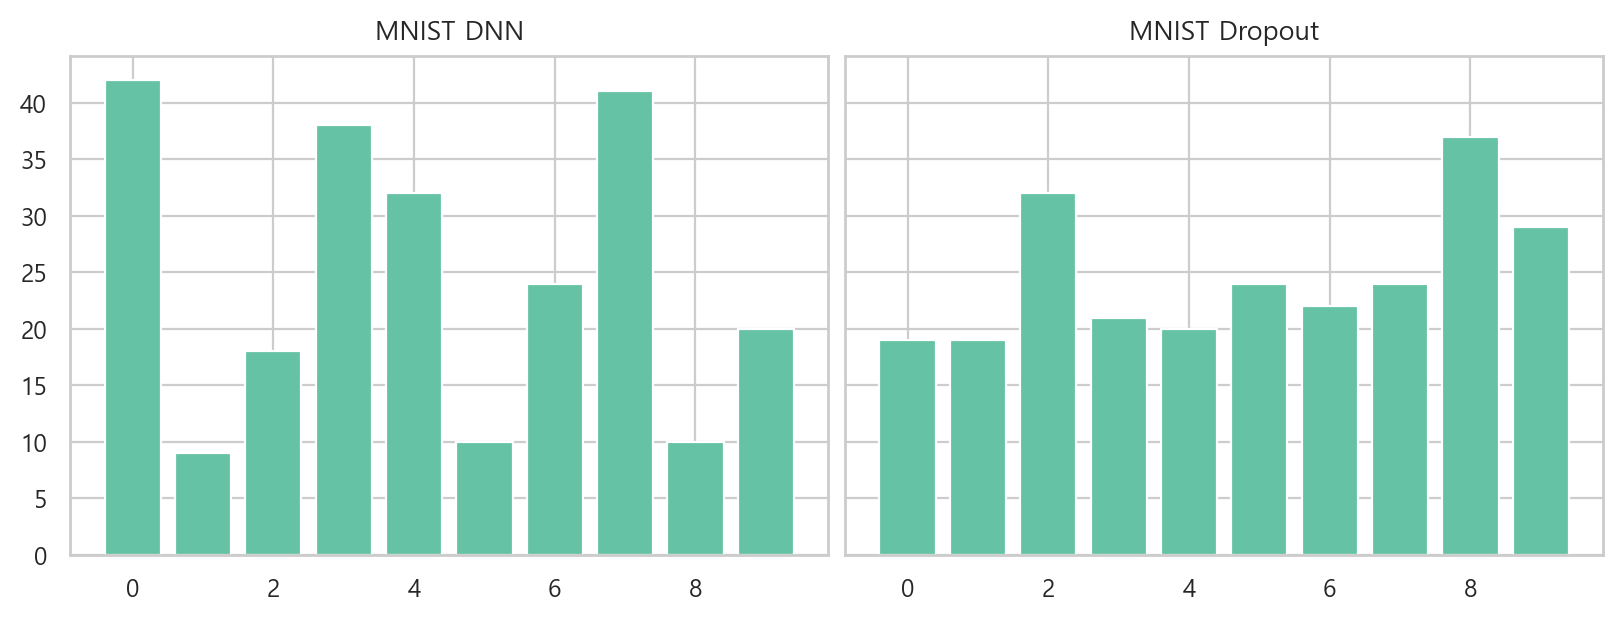

In [10]:
# dictionary sort
id_sorted = {k: v for k, v in sorted(incor_dict.items(), key=lambda item: item[0])}
idd_sorted = {k: v for k, v in sorted(incor_dropout_dict.items(), key=lambda item: item[0])}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3), sharey = True)
ax1.bar(id_sorted.keys(), id_sorted.values())
ax1.set(title = "MNIST DNN")

ax2.bar(idd_sorted.keys(), idd_sorted.values())
ax2.set(title = "MNIST Dropout");

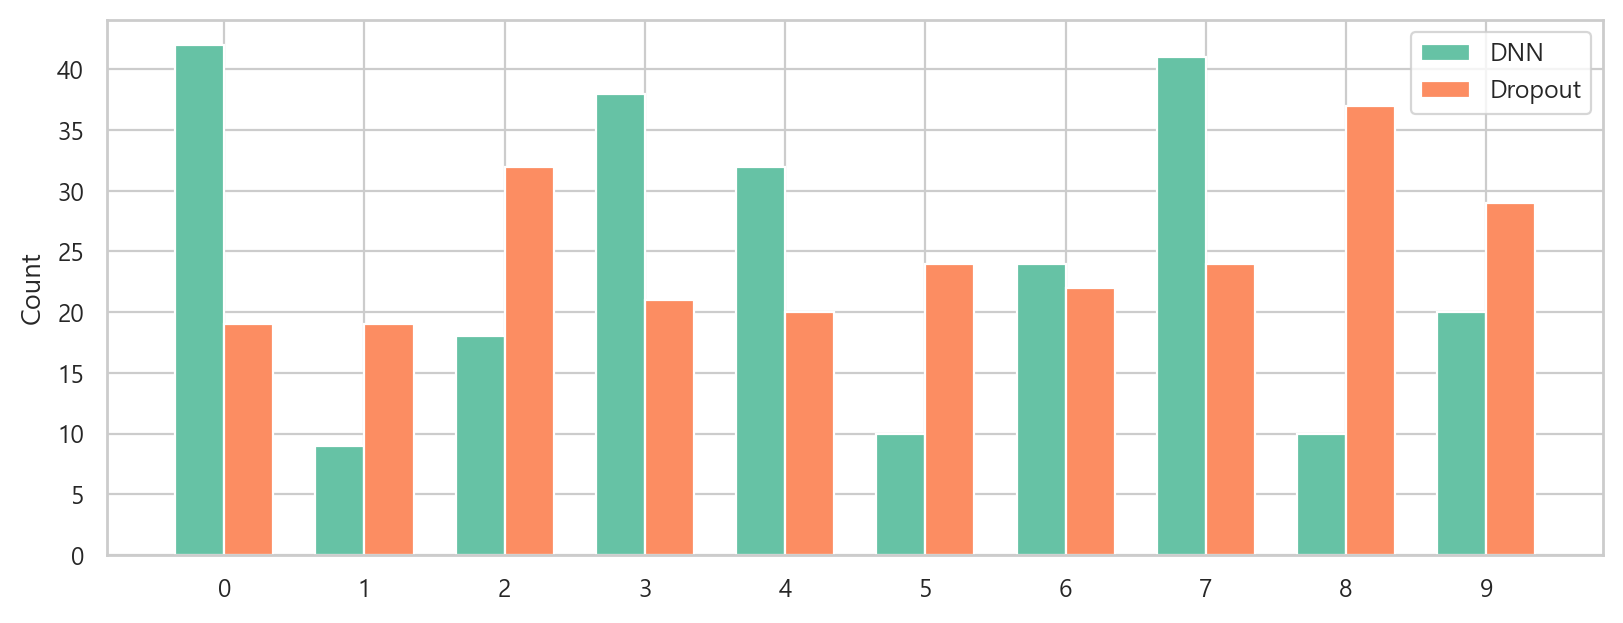

In [11]:
# dictionary sort
id_sorted = {k: v for k, v in sorted(incor_dict.items(), key=lambda item: item[0])}
idd_sorted = {k: v for k, v in sorted(incor_dropout_dict.items(), key=lambda item: item[0])}

ind = np.arange(10) 
width = 0.35


fig, ax = plt.subplots(figsize=(8,3))
rects1 = ax.bar(ind - width/2, 
                id_sorted.values(), 
                width,
                label = 'DNN')

rects2 = ax.bar(ind + width/2, 
                idd_sorted.values(), 
                width,
                label = 'Dropout')

ax.set(xticks = ind, ylabel = "Count")
ax.legend();

# 3. 많이 틀린 숫자를 무엇으로 인식했을까?


In [12]:
incor_indx_0 = [i for i in range(len(y_test)) if (y_test[i] != pred[i]) & (pred[i] == 0)]
incor_dropout_indx_8 = [i for i in range(len(y_test)) if (y_test[i] != pred_dropout[i]) & (pred_dropout[i] == 8)]

In [13]:
len(incor_indx_0)

42

In [14]:
incor_dict_0 = {}

for i in incor_indx_0:
    if y_test[i] in incor_dict_0:
        incor_dict_0[y_test[i]] += 1
    else:
        incor_dict_0[y_test[i]] = 1

In [15]:
incor_dict_0

{6: 7, 8: 12, 2: 10, 9: 4, 3: 3, 5: 3, 7: 1, 4: 2}

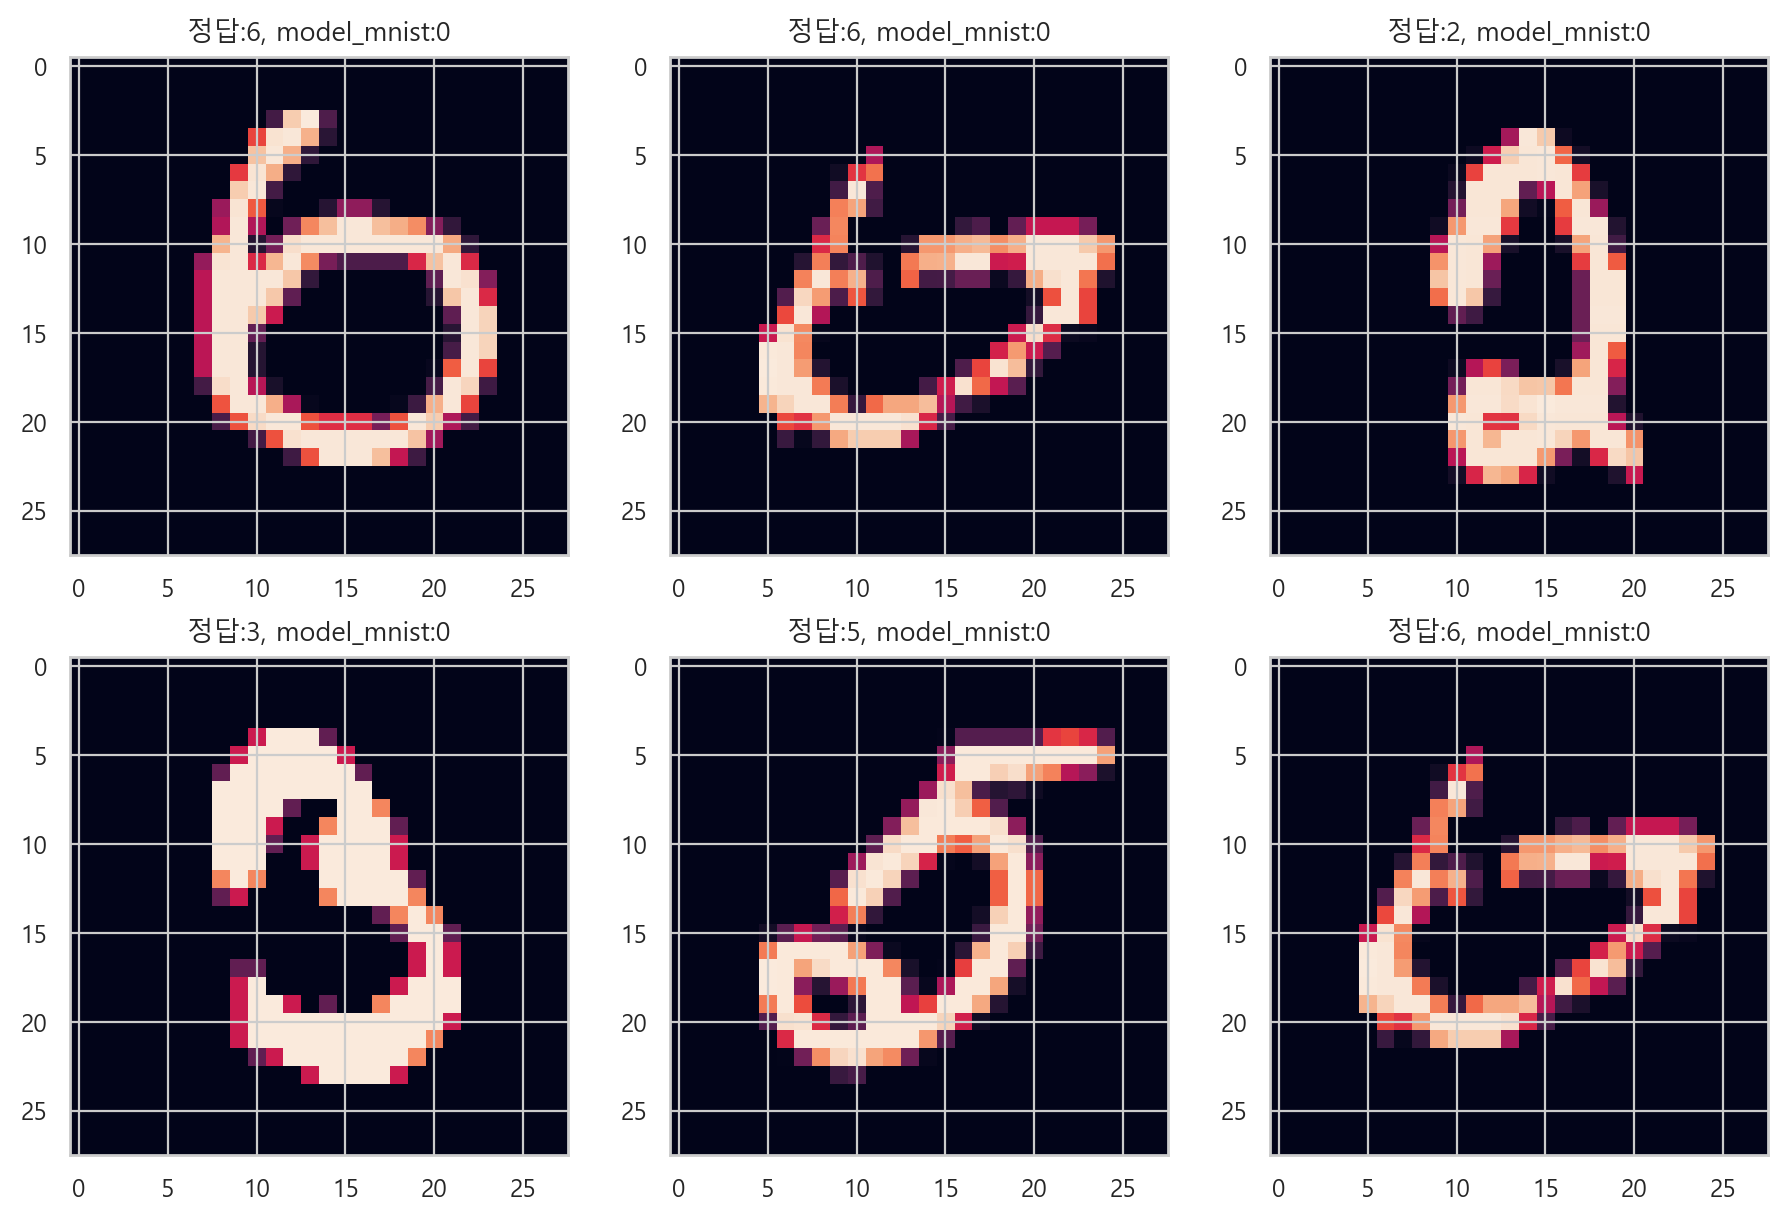

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(9,6))

for i, ax in zip(np.random.choice(incor_indx_0 , 6), axes.flat):
    ax.imshow(x_test[i])
    label = y_test[i]
    p_m = pred[i]
    ax.set(title = f"정답:{label}, model_mnist:{p_m}")